<a href="https://colab.research.google.com/github/RJ-R25/CC_Monolith_Optimized./blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


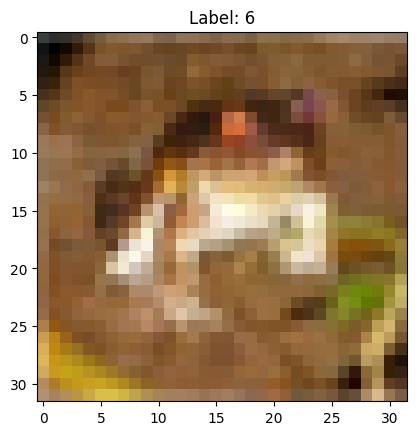

Image batch shape: (64, 32, 32, 3)
Label batch shape: (64, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# 1. Load the CIFAR-10 dataset using Keras
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3. Ensure the data shape is correct (RGB, 32x32x3)
print(f'Training data shape: {x_train.shape}')  # Expected: (50000, 32, 32, 3)
print(f'Test data shape: {x_test.shape}')        # Expected: (10000, 32, 32, 3)

# 4. Display an example image (optional)
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0][0]}")
plt.show()

# 5. Prepare TensorFlow datasets for training (optional)
batch_size = 64

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# Check batch shapes
for images, labels in train_dataset.take(1):
    print(f'Image batch shape: {images.shape}')  # Expected: (64, 32, 32, 3)
    print(f'Label batch shape: {labels.shape}')  # Expected: (64, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_lenet5(input_shape):
    """Builds the LeNet-5 CNN architecture.

    Args:
        input_shape: Tuple representing the shape of the input image
                     (e.g., (32, 32, 3) for CIFAR-10).

    Returns:
        A Keras model instance.
    """
    model = models.Sequential()

    # Layer 1: Convolutional Layer (6 filters, 5x5 kernel, ReLU activation)
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape, padding='same'))  # Added padding

    # Layer 2: Average Pooling Layer (2x2 pool size)
    model.add(layers.AveragePooling2D((2, 2)))

    # Layer 3: Convolutional Layer (16 filters, 5x5 kernel, ReLU activation)
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))

    # Layer 4: Average Pooling Layer (2x2 pool size)
    model.add(layers.AveragePooling2D((2, 2)))

    # Layer 5: Flatten Layer
    model.add(layers.Flatten())

    # Layer 6: Fully Connected Layer (120 units, ReLU activation)
    model.add(layers.Dense(120, activation='relu'))

    # Layer 7: Fully Connected Layer (84 units, ReLU activation)
    model.add(layers.Dense(84, activation='relu'))

    # Layer 8: Output Layer (10 units for CIFAR-10, softmax activation)
    model.add(layers.Dense(10, activation='softmax'))  # Changed output units to 10

    return model


# Example usage for CIFAR-10 (32x32x3)
input_shape_cifar10 = (32, 32, 3)  # Adjust for your image size and channels
lenet5_cifar10 = build_lenet5(input_shape_cifar10)

# Compile the model
lenet5_cifar10.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
                    metrics=['accuracy'])

# Print the model summary
lenet5_cifar10.summary()


# Example usage for MNIST (28x28x1) - Uncomment if needed
# input_shape_mnist = (28, 28, 1)
# lenet5_mnist = build_lenet5(input_shape_mnist)
# ... (compile and summary as needed)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 5  # Or 10
history = lenet5_cifar10.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3111 - loss: 1.8664 - val_accuracy: 0.4671 - val_loss: 1.4569
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4806 - loss: 1.4374 - val_accuracy: 0.5171 - val_loss: 1.3356
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5341 - loss: 1.3062 - val_accuracy: 0.5400 - val_loss: 1.2643
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5688 - loss: 1.2134 - val_accuracy: 0.5448 - val_loss: 1.2671
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5867 - loss: 1.1619 - val_accuracy: 0.5804 - val_loss: 1.1665


In [ ]:
import time

# Start time for training
start_time = time.time()

# Train the model (already done earlier)
epochs = 5
history = lenet5_cifar10.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

# Record training time
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate the model on the test data
test_loss, test_acc = lenet5_cifar10.evaluate(test_dataset)

# Print test accuracy and number of parameters
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Number of parameters: {lenet5_cifar10.count_params()}")

# Save results for tabulation
results = {
    "Model": "LeNet-5",
    "Training Accuracy": history.history['accuracy'][-1],
    "Validation Accuracy": history.history['val_accuracy'][-1],
    "Test Accuracy": test_acc,
    "Parameters": lenet5_cifar10.count_params(),
    "Training Time (s)": training_time
}

# Display the results
print("\nModel Results Summary:")
for key, value in results.items():
    print(f"{key}: {value}")

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6155 - loss: 1.0893 - val_accuracy: 0.5865 - val_loss: 1.1546
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6286 - loss: 1.0452 - val_accuracy: 0.5969 - val_loss: 1.1436
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6485 - loss: 1.0087 - val_accuracy: 0.5917 - val_loss: 1.1697
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6625 - loss: 0.9621 - val_accuracy: 0.6052 - val_loss: 1.1407
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6736 - loss: 0.9237 - val_accuracy: 0.6165 - val_loss: 1.0884
Training Time: 15.60 seconds
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6239 - loss: 1.0751
Test Accuracy: 0.6165
Test Loss: 1.0884
Number of parameters: 83126

Model Results Summary:
Model: LeNet-5
Training Accuracy: 0.6769599914550781
Validation Accuracy: 0.6165000200271606
Test Accuracy: 0.6165000200271606
Parameters: 83126
Training Time (s): 15.59

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_alexnet(input_shape):

    model = models.Sequential()

    # Layer 1: Convolutional Layer (96 filters, 5x5 kernel, stride 4, ReLU)
    model.add(layers.Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=input_shape, padding='same'))

    # Layer 2: Max Pooling Layer (2x2 pool size, stride 2)
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Layer 3: Convolutional Layer (256 filters, 5x5 kernel, ReLU)
    model.add(layers.Conv2D(256, (5, 5), activation='relu', padding='same'))

    # Layer 4: Max Pooling Layer (3x3 pool size, stride 2)
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Layer 5: Convolutional Layer (384 filters, 3x3 kernel, ReLU)
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))

    # Layer 6: Convolutional Layer (384 filters, 3x3 kernel, ReLU)
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))

    # Layer 7: Convolutional Layer (256 filters, 3x3 kernel, ReLU)
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))

    # Layer 8: Max Pooling Layer (3x3 pool size, stride 2)
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Layer 9: Flatten Layer
    model.add(layers.Flatten())

    # Layer 10: Fully Connected Layer (4096 units, ReLU)
    model.add(layers.Dense(4096, activation='relu'))

    # Layer 11: Fully Connected Layer (4096 units, ReLU)
    model.add(layers.Dense(4096, activation='relu'))

    # Layer 12: Output Layer (10 units for CIFAR-10, softmax)
    model.add(layers.Dense(10, activation='softmax'))

    return model


# Example usage for CIFAR-10 (32x32x3)
input_shape_cifar10 = (32, 32, 3)  # Adjust if you have different sized images
alexnet_cifar10 = build_alexnet(input_shape_cifar10)

# Compile the model
alexnet_cifar10.compile(optimizer='adam',  # You can experiment with other optimizers
                      loss='sparse_categorical_crossentropy',  # For integer labels
                      metrics=['accuracy'])

# Print the model summary
alexnet_cifar10.summary()

# Now you can train the model using your train_dataset and test_dataset
# alexnet_cifar10.fit(train_dataset, epochs=10, ...)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │       9,441,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,978,506 (114.36 MB)

 Trainable params: 29,978,506 (114.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 5  # Or 10, adjust as needed
history = alexnet_cifar10.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.2401 - loss: 1.9714 - val_accuracy: 0.5285 - val_loss: 1.2811
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.5476 - loss: 1.2411 - val_accuracy: 0.6097 - val_loss: 1.1012
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6394 - loss: 1.0117 - val_accuracy: 0.6663 - val_loss: 0.9569
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6961 - loss: 0.8671 - val_accuracy: 0.6955 - val_loss: 0.8747
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.7288 - loss: 0.7689 - val_accuracy: 0.7110 - val_loss: 0.8491


In [ ]:
import time

# Start time for training
start_time = time.time()

# Train the AlexNet model (already done)
epochs = 5
history = alexnet_cifar10.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

# Record training time
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate the model on the test data
test_loss, test_acc = alexnet_cifar10.evaluate(test_dataset)

# Print test accuracy and number of parameters
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Number of parameters: {alexnet_cifar10.count_params()}")

# Save results for tabulation
alexnet_results = {
    "Model": "AlexNet",
    "Training Accuracy": history.history['accuracy'][-1],
    "Validation Accuracy": history.history['val_accuracy'][-1],
    "Test Accuracy": test_acc,
    "Parameters": alexnet_cifar10.count_params(),
    "Training Time (s)": training_time
}

# Display the results
print("\nAlexNet Model Results Summary:")
for key, value in alexnet_results.items():
    print(f"{key}: {value}")

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7613 - loss: 0.6786 - val_accuracy: 0.7268 - val_loss: 0.8193
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.7833 - loss: 0.6178 - val_accuracy: 0.7289 - val_loss: 0.8010
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8052 - loss: 0.5497 - val_accuracy: 0.7322 - val_loss: 0.8624
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.8251 - loss: 0.5000 - val_accuracy: 0.7303 - val_loss: 0.8573
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.8455 - loss: 0.4391 - val_accuracy: 0.7490 - val_loss: 0.8645
Training Time: 161.55 seconds
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7533 - loss: 0.8495
Test Accuracy: 0.7490
Test Loss: 0.8645
Number of parameters: 29978506

AlexNet Model Results Summary:
Model: AlexNet
Training Accuracy: 0.8483800292015076
Validation Accuracy: 0.7490000128746033
Test Accuracy: 0.7490000128746033
Parameters: 2997850

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def residual_block(x, filters, kernel_size=3, strides=1, conv_shortcut=True, name=None):

    bn_axis = 3

    if conv_shortcut:
        shortcut = layers.Conv2D(4 * filters, 1, strides=strides, name=name + '_0_conv')(x)  # 1x1 conv for shortcut
        shortcut = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_0_bn')(shortcut)
    else:
        shortcut = x

    x = layers.Conv2D(filters, 1, strides=strides, name=name + '_1_conv')(x)
    x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_1_bn')(x)
    x = layers.Activation('relu', name=name + '_1_relu')(x)

    x = layers.Conv2D(filters, kernel_size, padding='SAME', name=name + '_2_conv')(x)
    x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_2_bn')(x)
    x = layers.Activation('relu', name=name + '_2_relu')(x)

    x = layers.Conv2D(4 * filters, 1, name=name + '_3_conv')(x)
    x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_3_bn')(x)

    x = layers.add([shortcut, x], name=name + '_add')
    x = layers.Activation('relu', name=name + '_out')(x)
    return x


def build_resnet18(input_shape, classes):
    """Builds ResNet-18 model."""
    bn_axis = 3

    img_input = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, 7, strides=2, padding='same', name='conv1_conv')(img_input)
    x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name='conv1_bn')(x)
    x = layers.Activation('relu', name='conv1_relu')(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same', name='pool1_pool')(x)

    x = residual_block(x, 64, name='conv2_block1')
    x = residual_block(x, 128, strides=2, name='conv3_block1')
    x = residual_block(x, 256, strides=2, name='conv4_block1')
    x = residual_block(x, 512, strides=2, name='conv5_block1')

    x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = layers.Dense(classes, activation='softmax', name='fc1000')(x)  # Adjusted for CIFAR-10

    model = models.Model(inputs=img_input, outputs=x, name='resnet18')

    return model

input_shape_cifar10 = (32, 32, 3)
num_classes = 10  # 10 classes for CIFAR-10
resnet18_cifar10 = build_resnet18(input_shape_cifar10, num_classes)

resnet18_cifar10.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

resnet18_cifar10.summary()

# Now you can train the model using your train_dataset and test_dataset
# resnet18_cifar10.fit(train_dataset, epochs=10, ...)

Model: "resnet18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 8, 8, 256)      │          1,024 │ conv2_block1_0_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 8,065,418 (30.77 MB)

 Trainable params: 8,046,090 (30.69 MB)

 Non-trainable params: 19,328 (75.50 KB)

In [ ]:
epochs = 5  # Or adjust
history = resnet18_cifar10.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.3941 - loss: 1.8948 - val_accuracy: 0.4675 - val_loss: 1.5919
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5884 - loss: 1.1812 - val_accuracy: 0.5505 - val_loss: 1.3839
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6673 - loss: 0.9730 - val_accuracy: 0.5777 - val_loss: 1.2974
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.7018 - loss: 0.8701 - val_accuracy: 0.6304 - val_loss: 1.0804
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7354 - loss: 0.7715 - val_accuracy: 0.6126 - val_loss: 1.1716


In [ ]:
import time

# Start time for training
start_time = time.time()

# Train the ResNet-18 model (already initiated)
epochs = 5
history = resnet18_cifar10.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

# Record training time
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate the model on the test data
test_loss, test_acc = resnet18_cifar10.evaluate(test_dataset)

# Print test accuracy and number of parameters
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Number of parameters: {resnet18_cifar10.count_params()}")

# Save results for tabulation
resnet_results = {
    "Model": "ResNet-18",
    "Training Accuracy": history.history['accuracy'][-1],
    "Validation Accuracy": history.history['val_accuracy'][-1],
    "Test Accuracy": test_acc,
    "Parameters": resnet18_cifar10.count_params(),
    "Training Time (s)": training_time
}

# Display the results
print("\nResNet-18 Model Results Summary:")
for key, value in resnet_results.items():
    print(f"{key}: {value}")


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7679 - loss: 0.6717 - val_accuracy: 0.6859 - val_loss: 1.0015
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7817 - loss: 0.6300 - val_accuracy: 0.6444 - val_loss: 1.2150
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.8182 - loss: 0.5262 - val_accuracy: 0.7129 - val_loss: 0.8946
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8480 - loss: 0.4415 - val_accuracy: 0.6937 - val_loss: 1.0041
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8638 - loss: 0.3899 - val_accuracy: 0.6880 - val_loss: 1.0782
Training Time: 70.39 seconds
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6914 - loss: 1.0575
Test Accuracy: 0.6880
Test Loss: 1.0782
Number of parameters: 8065418

ResNet-18 Model Results Summary:
Model: ResNet-18
Training Accuracy: 0.8557199835777283
Validation Accuracy: 0.6880000233650208
Test Accuracy: 0.6880000233650208
Parameters: 806541

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Flatten, Dense

# 1. Load and preprocess MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist = x_train_mnist.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test_mnist = x_test_mnist.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
y_train_mnist = to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = to_categorical(y_test_mnist, num_classes=10)

# 2. Define LeNet-5 for MNIST
mnist_lenet = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),  # Output: (28, 28, 6)
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),              # Output: (14, 14, 6)
    Conv2D(16, (5, 5), activation='relu'),                           # Output: (10, 10, 16)
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),              # Output: (5, 5, 16)
    Flatten(),                                                       # Output: 400
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')  # Use softmax for classification
])

# 3. Define AlexNet for MNIST
mnist_alexnet = Sequential([
    Conv2D(96, (5, 5), activation='relu', input_shape=(28, 28, 1)),   # Output: (28, 28, 96)
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),                      # Output: (14, 14, 96)
    Conv2D(256, (5, 5), padding="same", activation='relu'),           # Output: (14, 14, 256)
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),                      # Output: (7, 7, 256)
    Conv2D(384, (3, 3), padding="same", activation='relu'),           # Output: (7, 7, 384)
    Conv2D(384, (3, 3), padding="same", activation='relu'),           # Output: (7, 7, 384)
    Conv2D(256, (3, 3), padding="same", activation='relu'),           # Output: (7, 7, 256)
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),                      # Output: (3, 3, 256)
    Flatten(),                                                        # Output: 2304
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  # Use softmax for classification
])

# 4. Compile models
mnist_lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mnist_alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Print model summaries
mnist_lenet.summary()
mnist_alexnet.summary()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 96)          │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 12, 12, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,373,450 (16.68 MB)

 Trainable params: 4,373,450 (16.68 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the LeNet model for 5 epochs
lenet_history = mnist_lenet.fit(x_train_mnist, y_train_mnist, epochs=5, batch_size=64, validation_data=(x_test_mnist, y_test_mnist))

# Evaluate the LeNet model on test data
#lenet_test_loss, lenet_test_acc = mnist_lenet.evaluate(x_test_mnist, y_test_mnist)
#print(f"LeNet Test Accuracy: {lenet_test_acc:.4f}")

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8160 - loss: 0.6160 - val_accuracy: 0.9714 - val_loss: 0.0899
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9707 - loss: 0.0955 - val_accuracy: 0.9742 - val_loss: 0.0743
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9788 - loss: 0.0681 - val_accuracy: 0.9847 - val_loss: 0.0469
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0546 - val_accuracy: 0.9890 - val_loss: 0.0335
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0435 - val_accuracy: 0.9894 - val_loss: 0.0335


In [ ]:
import time

# Start time for training
start_time = time.time()

# Train the LeNet-5 model (if not already done)
lenet_history = mnist_lenet.fit(x_train_mnist, y_train_mnist, epochs=5, batch_size=64, validation_data=(x_test_mnist, y_test_mnist))

# Record training time
training_time_lenet = time.time() - start_time

# Evaluate LeNet-5 on the test data
test_loss_lenet, test_acc_lenet = mnist_lenet.evaluate(x_test_mnist, y_test_mnist)

# Get the number of parameters
params_lenet = mnist_lenet.count_params()

# Record final training and validation accuracy
training_acc_lenet = lenet_history.history['accuracy'][-1]
validation_acc_lenet = lenet_history.history['val_accuracy'][-1]

# Display results for LeNet-5
print("\nLeNet-5 Results:")
print(f"Training Accuracy: {training_acc_lenet:.4f}")
print(f"Validation Accuracy: {validation_acc_lenet:.4f}")
print(f"Test Accuracy: {test_acc_lenet:.4f}")
print(f"Test Loss: {test_loss_lenet:.4f}")
print(f"Number of Parameters: {params_lenet}")
print(f"Training Time: {training_time_lenet:.2f} seconds")

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9879 - loss: 0.0357 - val_accuracy: 0.9885 - val_loss: 0.0344
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9904 - loss: 0.0305 - val_accuracy: 0.9904 - val_loss: 0.0301
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9915 - loss: 0.0255 - val_accuracy: 0.9902 - val_loss: 0.0299
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9923 - loss: 0.0246 - val_accuracy: 0.9896 - val_loss: 0.0329
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9934 - loss: 0.0192 - val_accuracy: 0.9877 - val_loss: 0.0359
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.0465

LeNet-5 Results:
Training Accuracy: 0.9932
Validation Accuracy: 0.9877
Test Accuracy: 0.9877
Test Loss: 0.0359
Number of Parameters: 44426
Training Time: 19.89 seconds


In [ ]:
# Train the AlexNet model for 5 epochs
alexnet_history = mnist_alexnet.fit(x_train_mnist, y_train_mnist, epochs=5, batch_size=64, validation_data=(x_test_mnist, y_test_mnist))

# Evaluate the AlexNet model on test data
#alexnet_test_loss, alexnet_test_acc = mnist_alexnet.evaluate(x_test_mnist, y_test_mnist)
#print(f"AlexNet Test Accuracy: {alexnet_test_acc:.4f}")

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step - accuracy: 0.8471 - loss: 0.4345 - val_accuracy: 0.9839 - val_loss: 0.0528
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9865 - loss: 0.0474 - val_accuracy: 0.9900 - val_loss: 0.0328
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9891 - loss: 0.0410 - val_accuracy: 0.9906 - val_loss: 0.0300
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9923 - loss: 0.0277 - val_accuracy: 0.9881 - val_loss: 0.0522
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9921 - loss: 0.0296 - val_accuracy: 0.9912 - val_loss: 0.0324


In [ ]:
import time

# Start time for training
start_time = time.time()

# Train the AlexNet model (if not already done)
alexnet_history = mnist_alexnet.fit(x_train_mnist, y_train_mnist, epochs=5, batch_size=64, validation_data=(x_test_mnist, y_test_mnist))

# Record training time
training_time_alexnet = time.time() - start_time

# Evaluate AlexNet on the test data
test_loss_alexnet, test_acc_alexnet = mnist_alexnet.evaluate(x_test_mnist, y_test_mnist)

# Get the number of parameters
params_alexnet = mnist_alexnet.count_params()

# Record final training and validation accuracy
training_acc_alexnet = alexnet_history.history['accuracy'][-1]
validation_acc_alexnet = alexnet_history.history['val_accuracy'][-1]

# Display results for AlexNet
print("\nAlexNet Results:")
print(f"Training Accuracy: {training_acc_alexnet:.4f}")
print(f"Validation Accuracy: {validation_acc_alexnet:.4f}")
print(f"Test Accuracy: {test_acc_alexnet:.4f}")
print(f"Test Loss: {test_loss_alexnet:.4f}")
print(f"Number of Parameters: {params_alexnet}")
print(f"Training Time: {training_time_alexnet:.2f} seconds")

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9943 - loss: 0.0205 - val_accuracy: 0.9901 - val_loss: 0.0350
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9954 - loss: 0.0164 - val_accuracy: 0.9905 - val_loss: 0.0380
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9958 - loss: 0.0179 - val_accuracy: 0.9925 - val_loss: 0.0354
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9966 - loss: 0.0121 - val_accuracy: 0.9929 - val_loss: 0.0396
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9957 - loss: 0.0183 - val_accuracy: 0.9919 - val_loss: 0.0335
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9895 - loss: 0.0408

AlexNet Results:
Training Accuracy: 0.9961
Validation Accuracy: 0.9919
Test Accuracy: 0.9919
Test Loss: 0.0335
Number of Parameters: 4373450
Training Time: 102.19 seconds


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a residual block without bottleneck
def residual_block(x, filters, strides=1, downsample=False, name=None):
    shortcut = x

    # Convolution 1
    x = layers.Conv2D(filters, kernel_size=3, strides=strides, padding='same', use_bias=False, name=name + '_conv1')(x)
    x = layers.BatchNormalization(name=name + '_bn1')(x)
    x = layers.Activation('relu', name=name + '_relu1')(x)

    # Convolution 2
    x = layers.Conv2D(filters, kernel_size=3, padding='same', use_bias=False, name=name + '_conv2')(x)
    x = layers.BatchNormalization(name=name + '_bn2')(x)

    # Downsample if necessary
    if downsample:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=strides, use_bias=False, name=name + '_shortcut')(shortcut)
        shortcut = layers.BatchNormalization(name=name + '_shortcut_bn')(shortcut)

    # Add shortcut and apply ReLU activation
    x = layers.Add(name=name + '_add')([shortcut, x])
    x = layers.Activation('relu', name=name + '_out')(x)

    return x


# Build the ResNet-18 model for MNIST
def build_resnet18_mnist(input_shape, classes):
    inputs = layers.Input(shape=input_shape)

    # Initial Conv Layer
    x = layers.Conv2D(64, kernel_size=3, strides=1, padding='same', use_bias=False, name='conv1')(inputs)
    x = layers.BatchNormalization(name='conv1_bn')(x)
    x = layers.Activation('relu', name='conv1_relu')(x)

    # Residual Blocks
    x = residual_block(x, filters=64, name='conv2_block1')
    x = residual_block(x, filters=64, name='conv2_block2')

    x = residual_block(x, filters=128, strides=2, downsample=True, name='conv3_block1')
    x = residual_block(x, filters=128, name='conv3_block2')

    x = residual_block(x, filters=256, strides=2, downsample=True, name='conv4_block1')
    x = residual_block(x, filters=256, name='conv4_block2')

    x = residual_block(x, filters=512, strides=2, downsample=True, name='conv5_block1')
    x = residual_block(x, filters=512, name='conv5_block2')

    # Global Average Pooling and Output Layer
    x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
    outputs = layers.Dense(classes, activation='softmax', name='fc')(x)

    model = models.Model(inputs=inputs, outputs=outputs, name='resnet18_mnist')

    return model


# Define input shape and number of classes for MNIST
input_shape_mnist = (28, 28, 1)
num_classes_mnist = 10

# Create ResNet-18 model for MNIST
mnist_resnet18 = build_resnet18_mnist(input_shape=input_shape_mnist, classes=num_classes_mnist)

# Compile the model
mnist_resnet18.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
mnist_resnet18.summary()

Model: "resnet18_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv2D)            │ (None, 28, 28, 64)     │            576 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 28, 28, 64)     │            256 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 28, 28, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_conv1        │ (None, 28, 28, 64)     │         36,864 │ conv1_relu[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_bn1          │ (None, 28, 28, 64)     │            256 │ conv2_block1_conv1[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_relu1        │ (None, 28, 28, 64)     │              0 │ conv2_block1_bn1[0][0] │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_conv2        │ (None, 28, 28, 64)     │         36,864 │ conv2_block1_relu1[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_bn2          │ (None, 28, 28, 64)     │            256 │ conv2_block1_conv2[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_add (Add)    │ (None, 28, 28, 64)     │              0 │ conv1_relu[0][0],      │
│                           │                        │                │ conv2_block1_bn2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_out          │ (None, 28, 28, 64)     │              0 │ conv2_block1_add[0][0] │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_conv1        │ (None, 28, 28, 64)     │         36,864 │ conv2_block1_out[0][0] │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_bn1          │ (None, 28, 28, 64)     │            256 │ conv2_block2_conv1[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_relu1        │ (None, 28, 28, 64)     │              0 │ conv2_block2_bn1[0][0] │
│ (Activation)         

 Total params: 11,182,410 (42.66 MB)

 Trainable params: 11,172,810 (42.62 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [ ]:
resnet_history = mnist_resnet18.fit(x_train_mnist, y_train_mnist, epochs=5, batch_size=64, validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 79ms/step - accuracy: 0.9294 - loss: 0.2316 - val_accuracy: 0.9333 - val_loss: 0.2463
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 121s 67ms/step - accuracy: 0.9865 - loss: 0.0448 - val_accuracy: 0.9898 - val_loss: 0.0357
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9891 - loss: 0.0336 - val_accuracy: 0.9637 - val_loss: 0.1388
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9912 - loss: 0.0303 - val_accuracy: 0.9890 - val_loss: 0.0362
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9931 - loss: 0.0232 - val_accuracy: 0.9845 - val_loss: 0.0552


In [ ]:
import time

# Start time for training
start_time = time.time()

# Train the ResNet-18 model
resnet_history = mnist_resnet18.fit(
    x_train_mnist,
    y_train_mnist,
    epochs=5,
    batch_size=64,
    validation_data=(x_test_mnist, y_test_mnist)
)

# Record training time
training_time_resnet = time.time() - start_time

# Evaluate ResNet-18 on the test data
test_loss_resnet, test_acc_resnet = mnist_resnet18.evaluate(x_test_mnist, y_test_mnist)

# Get the number of parameters
params_resnet = mnist_resnet18.count_params()

# Record final training and validation accuracy
training_acc_resnet = resnet_history.history['accuracy'][-1]
validation_acc_resnet = resnet_history.history['val_accuracy'][-1]

# Display results for ResNet-18
print("\nResNet-18 Results (MNIST):")
print(f"Training Accuracy: {training_acc_resnet:.4f}")
print(f"Validation Accuracy: {validation_acc_resnet:.4f}")
print(f"Test Accuracy: {test_acc_resnet:.4f}")
print(f"Test Loss: {test_loss_resnet:.4f}")
print(f"Number of Parameters: {params_resnet}")
print(f"Training Time: {training_time_resnet:.2f} seconds")

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - accuracy: 0.9939 - loss: 0.0206 - val_accuracy: 0.9924 - val_loss: 0.0309
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.9944 - loss: 0.0179 - val_accuracy: 0.9260 - val_loss: 0.2806
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accuracy: 0.9824 - val_loss: 0.0553
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9962 - loss: 0.0129 - val_accuracy: 0.9907 - val_loss: 0.0363
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9962 - loss: 0.0125 - val_accuracy: 0.9923 - val_loss: 0.0264
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9891 - loss: 0.0390

ResNet-18 Results (MNIST):
Training Accuracy: 0.9951
Validation Accuracy: 0.9923
Test Accuracy: 0.9923
Test Loss: 0.0264
Number of Parameters: 11182410
Training Time: 391.43 seconds
